<a href="https://colab.research.google.com/github/mahidul5130/Fresh-or-Stale-Leveraging-Deep-Learning-to-Detect-Freshness-of-Fruits-and-Vegetables/blob/main/OrganizeDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Unrar, Move, Remove, Augmatation and Copy**

**Extract**

In [ ]:
!pip install patool
import patoolib
patoolib.extract_archive("E:/master data file.rar", outdir="C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection")

patool: Extracting E:/master data file.rar ...
patool: running "C:\Program Files\WinRAR\rar.EXE" x -- "E:\master data file.rar"
patool:     with cwd="C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection"
patool: ... E:/master data file.rar extracted to `C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection'.


'C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection'

**Move**

In [ ]:
import os

source = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/train/"
destination = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/"

allfiles = os.listdir(source)

for f in allfiles:
	os.rename(source + f, destination + f)

**Remove**

In [ ]:
!rmdir "C:\Users\88017\OneDrive - LS\Desktop\Food Freshness Detection\master data file\train\"

**Copy Folder**

In [ ]:
import shutil
import os

# path to source directory
src_dir = '/content/drive/MyDrive/THESIS/Data/FinDataset'

# path to destination directory
dest_dir = '/content/drive/MyDrive/FinDataset'

# getting all the files in the source directory
files = os.listdir(src_dir)

shutil.copytree(src_dir, dest_dir)

# **Comparing amount of data in each class**

In [ ]:
# import OS module
import os
def CountClasses(path):
  dir_list = os.listdir(path)
  print(len(dir_list))
  return dir_list

path = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/"

classes = CountClasses(path)

16


In [ ]:
def CountImages(path):
  dir_list = os.listdir(path)
  return len(dir_list)

data={}

for element in classes:
  total_images = CountImages(path+element)
  data[element] = total_images

In [ ]:
for key, value in data.items():
    print(key, ' : ', value)

fresh_apple  :  9677
fresh_banana  :  6908
fresh_capsicum  :  1078
fresh_guava  :  1152
fresh_lime  :  1094
fresh_orange  :  6192
fresh_pomegranate  :  5940
fresh_tomato  :  3718
stale_apple  :  3483
stale_banana  :  2554
stale_capsicum  :  901
stale_guava  :  1129
stale_lime  :  1085
stale_orange  :  2754
stale_pomegranate  :  1187
stale_tomato  :  982


C:\Users\88017\AppData\Local\Temp/ipykernel_13032/2563652179.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, values[i], values[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))


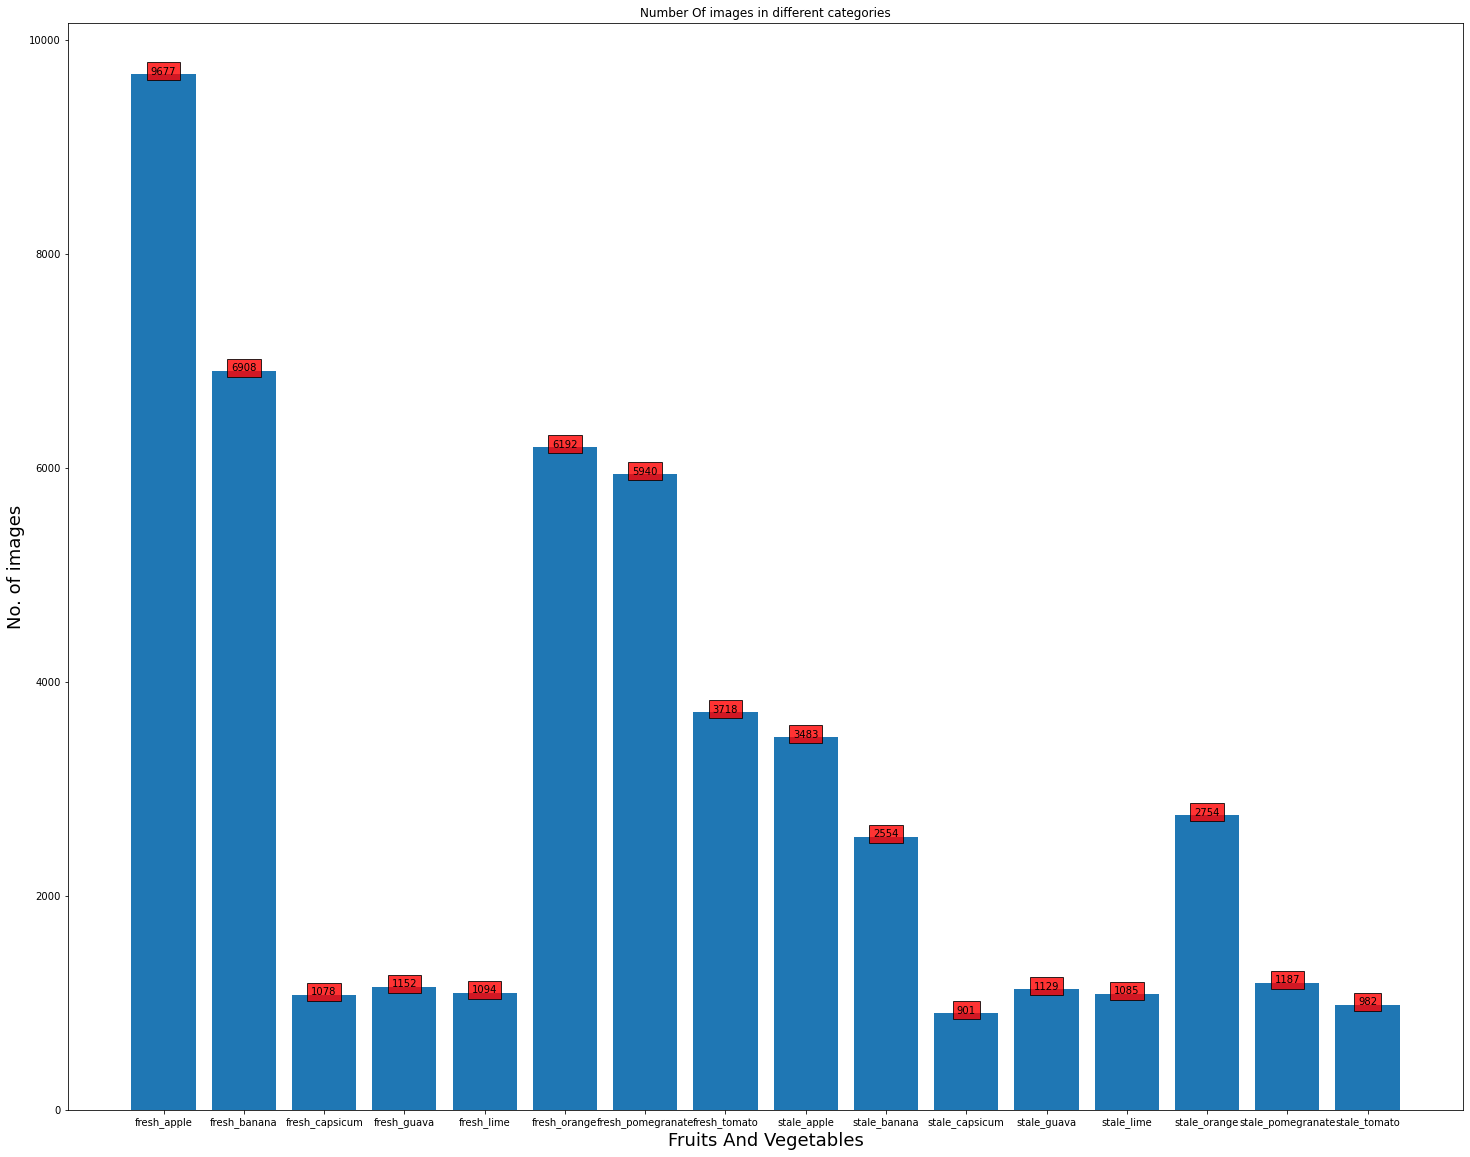

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

FruitsAndVegetables = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (25, 20))

plt.bar(FruitsAndVegetables, values)

for i in range(len(FruitsAndVegetables)):
        plt.text(i, values[i], values[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))
        
plt.xlabel("Fruits And Vegetables", fontsize=18)
plt.ylabel("No. of images", fontsize=18)
plt.title("Number Of images in different categories")

plt.show()

# **Data Augmentation**

In [ ]:
## This is a level 2 heading
import imageio
from keras.preprocessing.image import ImageDataGenerator
import numpy as np


def Augmentation(image_path, num_images, save_directory):
  datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
  height_shift_range=0.1,shear_range=0.15, 
  zoom_range=0.1,channel_shift_range = 10, horizontal_flip=True)

  image = np.expand_dims(imageio.imread(image_path), 0)


  datagen.fit(image)

  for x, val in zip(datagen.flow(image, save_to_dir=save_directory, save_prefix='aug', save_format='png'),range(num_images)):
    pass

In [ ]:
import glob
import os
path = "C:/Users/DELL/archive/"
for i in os.listdir(path):
    path = "C:/Users/DELL/archive/"
    if len(os.listdir(path+i)) <= 2000:
        save_directory=f"C:/Users/DELL/archive/aug_{i}"
        path=f"C:/Users/DELL/archive/{i}**/*"

        if not os.path.exists(save_directory):
          # Create a new directory because it does not exist 
          os.makedirs(save_directory)
          print("The new directory is created!")


        num_images = 2

        count = 0 
        for image_path in glob.iglob(path, recursive=True):
          try:
            Augmentation(image_path, num_images, save_directory)
          except ValueError:
            print("ValueError")
          print(f"{count}: {image_path}")
          count = count + 1

The new directory is created!
0: C:/Users/DELL/archive\fresh_meat\test_20171016_104321D.jpg
1: C:/Users/DELL/archive\fresh_meat\test_20171016_104521D.jpg
2: C:/Users/DELL/archive\fresh_meat\test_20171016_104721D.jpg
3: C:/Users/DELL/archive\fresh_meat\test_20171016_104921D.jpg
4: C:/Users/DELL/archive\fresh_meat\test_20171016_105121D.jpg
5: C:/Users/DELL/archive\fresh_meat\test_20171016_105321D.jpg
6: C:/Users/DELL/archive\fresh_meat\test_20171016_105521D.jpg
7: C:/Users/DELL/archive\fresh_meat\test_20171016_105721D.jpg
8: C:/Users/DELL/archive\fresh_meat\test_20171016_105921D.jpg
9: C:/Users/DELL/archive\fresh_meat\test_20171016_110121D.jpg
10: C:/Users/DELL/archive\fresh_meat\test_20171016_110321D.jpg
11: C:/Users/DELL/archive\fresh_meat\test_20171016_110521D.jpg
12: C:/Users/DELL/archive\fresh_meat\test_20171016_110721D.jpg
13: C:/Users/DELL/archive\fresh_meat\test_20171016_110921D.jpg
14: C:/Users/DELL/archive\fresh_meat\test_20171016_111121D.jpg
15: C:/Users/DELL/archive\fresh_mea

130: C:/Users/DELL/archive\fresh_meat\test_20171016_150721D.jpg
131: C:/Users/DELL/archive\fresh_meat\test_20171016_150921D.jpg
132: C:/Users/DELL/archive\fresh_meat\test_20171016_151121D.jpg
133: C:/Users/DELL/archive\fresh_meat\test_20171016_151321D.jpg
134: C:/Users/DELL/archive\fresh_meat\test_20171016_151521D.jpg
135: C:/Users/DELL/archive\fresh_meat\test_20171016_151721D.jpg
136: C:/Users/DELL/archive\fresh_meat\test_20171016_151921D.jpg
137: C:/Users/DELL/archive\fresh_meat\test_20171016_152121D.jpg
138: C:/Users/DELL/archive\fresh_meat\test_20171016_152321D.jpg
139: C:/Users/DELL/archive\fresh_meat\test_20171016_152521D.jpg
140: C:/Users/DELL/archive\fresh_meat\test_20171016_152721D.jpg
141: C:/Users/DELL/archive\fresh_meat\test_20171016_152921D.jpg
142: C:/Users/DELL/archive\fresh_meat\test_20171016_153121D.jpg
143: C:/Users/DELL/archive\fresh_meat\test_20171016_153321D.jpg
144: C:/Users/DELL/archive\fresh_meat\test_20171016_153521D.jpg
145: C:/Users/DELL/archive\fresh_meat\te

259: C:/Users/DELL/archive\fresh_meat\test_20171016_192921D.jpg
260: C:/Users/DELL/archive\fresh_meat\test_20171016_193121D.jpg
261: C:/Users/DELL/archive\fresh_meat\test_20171016_193321D.jpg
262: C:/Users/DELL/archive\fresh_meat\test_20171016_193521D.jpg
263: C:/Users/DELL/archive\fresh_meat\test_20171016_193721D.jpg
264: C:/Users/DELL/archive\fresh_meat\test_20171016_193921D.jpg
265: C:/Users/DELL/archive\fresh_meat\test_20171016_194121D.jpg
266: C:/Users/DELL/archive\fresh_meat\test_20171016_194321D.jpg
267: C:/Users/DELL/archive\fresh_meat\test_20171016_194921D.jpg
268: C:/Users/DELL/archive\fresh_meat\test_20171016_195121D.jpg
269: C:/Users/DELL/archive\fresh_meat\test_20171016_195321D.jpg
270: C:/Users/DELL/archive\fresh_meat\test_20171016_195521D.jpg
271: C:/Users/DELL/archive\fresh_meat\test_20171016_195721D.jpg
272: C:/Users/DELL/archive\fresh_meat\test_20171016_195921D.jpg
273: C:/Users/DELL/archive\fresh_meat\test_20171016_200121D.jpg
274: C:/Users/DELL/archive\fresh_meat\te

388: C:/Users/DELL/archive\fresh_meat\test_20171016_235521D.jpg
389: C:/Users/DELL/archive\fresh_meat\test_20171016_235721D.jpg
390: C:/Users/DELL/archive\fresh_meat\test_20171016_235921D.jpg
391: C:/Users/DELL/archive\fresh_meat\test_20171017_000121D.jpg
392: C:/Users/DELL/archive\fresh_meat\test_20171017_000321D.jpg
393: C:/Users/DELL/archive\fresh_meat\test_20171017_000521D.jpg
394: C:/Users/DELL/archive\fresh_meat\test_20171017_000721D.jpg
395: C:/Users/DELL/archive\fresh_meat\test_20171017_000921D.jpg
396: C:/Users/DELL/archive\fresh_meat\test_20171017_001121D.jpg
397: C:/Users/DELL/archive\fresh_meat\test_20171017_001321D.jpg
398: C:/Users/DELL/archive\fresh_meat\test_20171017_001521D.jpg
399: C:/Users/DELL/archive\fresh_meat\test_20171017_001721D.jpg
400: C:/Users/DELL/archive\fresh_meat\test_20171017_001921D.jpg
401: C:/Users/DELL/archive\fresh_meat\test_20171017_002121D.jpg
402: C:/Users/DELL/archive\fresh_meat\test_20171017_002321D.jpg
403: C:/Users/DELL/archive\fresh_meat\te

517: C:/Users/DELL/archive\fresh_meat\test_20171017_041721D.jpg
518: C:/Users/DELL/archive\fresh_meat\test_20171017_041921D.jpg
519: C:/Users/DELL/archive\fresh_meat\test_20171017_042121D.jpg
520: C:/Users/DELL/archive\fresh_meat\test_20171017_042321D.jpg
521: C:/Users/DELL/archive\fresh_meat\test_20171017_042521D.jpg
522: C:/Users/DELL/archive\fresh_meat\test_20171017_042721D.jpg
523: C:/Users/DELL/archive\fresh_meat\test_20171017_042921D.jpg
524: C:/Users/DELL/archive\fresh_meat\test_20171017_043121D.jpg
525: C:/Users/DELL/archive\fresh_meat\test_20171017_043321D.jpg
526: C:/Users/DELL/archive\fresh_meat\test_20171017_043521D.jpg
527: C:/Users/DELL/archive\fresh_meat\test_20171017_043721D.jpg
528: C:/Users/DELL/archive\fresh_meat\test_20171017_043921D.jpg
529: C:/Users/DELL/archive\fresh_meat\test_20171017_044121D.jpg
530: C:/Users/DELL/archive\fresh_meat\test_20171017_044321D.jpg
531: C:/Users/DELL/archive\fresh_meat\test_20171017_044921D.jpg
532: C:/Users/DELL/archive\fresh_meat\te

646: C:/Users/DELL/archive\fresh_meat\test_20171017_084321D.jpg
647: C:/Users/DELL/archive\fresh_meat\test_20171017_084521D.jpg
648: C:/Users/DELL/archive\fresh_meat\test_20171017_084721D.jpg
649: C:/Users/DELL/archive\fresh_meat\test_20171017_084921D.jpg
650: C:/Users/DELL/archive\fresh_meat\test_20171017_085121D.jpg
651: C:/Users/DELL/archive\fresh_meat\test_20171017_085321D.jpg
652: C:/Users/DELL/archive\fresh_meat\test_20171017_085521D.jpg
653: C:/Users/DELL/archive\fresh_meat\test_20171017_085721D.jpg
654: C:/Users/DELL/archive\fresh_meat\test_20171017_085921D.jpg
655: C:/Users/DELL/archive\fresh_meat\test_20171017_090121D.jpg
656: C:/Users/DELL/archive\fresh_meat\test_20171017_090321D.jpg
657: C:/Users/DELL/archive\fresh_meat\test_20171017_090521D.jpg
658: C:/Users/DELL/archive\fresh_meat\test_20171017_090721D.jpg
659: C:/Users/DELL/archive\fresh_meat\test_20171017_090921D.jpg
660: C:/Users/DELL/archive\fresh_meat\test_20171017_091121D.jpg
661: C:/Users/DELL/archive\fresh_meat\te

775: C:/Users/DELL/archive\fresh_meat\test_20171017_130721D.jpg
776: C:/Users/DELL/archive\fresh_meat\test_20171017_130921D.jpg
777: C:/Users/DELL/archive\fresh_meat\test_20171017_131121D.jpg
778: C:/Users/DELL/archive\fresh_meat\test_20171017_131321D.jpg
779: C:/Users/DELL/archive\fresh_meat\test_20171017_131521D.jpg
780: C:/Users/DELL/archive\fresh_meat\test_20171017_131721D.jpg
781: C:/Users/DELL/archive\fresh_meat\test_20171017_131921D.jpg
782: C:/Users/DELL/archive\fresh_meat\test_20171017_132121D.jpg
783: C:/Users/DELL/archive\fresh_meat\test_20171017_132321D.jpg
784: C:/Users/DELL/archive\fresh_meat\test_20171017_132521D.jpg
785: C:/Users/DELL/archive\fresh_meat\test_20171017_132721D.jpg
786: C:/Users/DELL/archive\fresh_meat\test_20171017_132921D.jpg
787: C:/Users/DELL/archive\fresh_meat\test_20171017_133121D.jpg
788: C:/Users/DELL/archive\fresh_meat\test_20171017_133321D.jpg
789: C:/Users/DELL/archive\fresh_meat\test_20171017_133521D.jpg
790: C:/Users/DELL/archive\fresh_meat\te

904: C:/Users/DELL/archive\fresh_meat\test_20171017_173321D.jpg
905: C:/Users/DELL/archive\fresh_meat\test_20171017_173521D.jpg
906: C:/Users/DELL/archive\fresh_meat\test_20171017_173721D.jpg
907: C:/Users/DELL/archive\fresh_meat\test_20171017_173921D.jpg
908: C:/Users/DELL/archive\fresh_meat\test_20171017_174121D.jpg
909: C:/Users/DELL/archive\fresh_meat\test_20171017_174321D.jpg
910: C:/Users/DELL/archive\fresh_meat\test_20171017_174521D.jpg
911: C:/Users/DELL/archive\fresh_meat\test_20171017_174721D.jpg
912: C:/Users/DELL/archive\fresh_meat\test_20171017_174921D.jpg
913: C:/Users/DELL/archive\fresh_meat\test_20171017_175121D.jpg
914: C:/Users/DELL/archive\fresh_meat\test_20171017_175321D.jpg
915: C:/Users/DELL/archive\fresh_meat\test_20171017_175521D.jpg
916: C:/Users/DELL/archive\fresh_meat\test_20171017_175721D.jpg
917: C:/Users/DELL/archive\fresh_meat\test_20171017_175921D.jpg
918: C:/Users/DELL/archive\fresh_meat\test_20171017_180121D.jpg
919: C:/Users/DELL/archive\fresh_meat\te

86: C:/Users/DELL/archive\stale_meat\test_20171017_215721D.jpg
87: C:/Users/DELL/archive\stale_meat\test_20171017_215921D.jpg
88: C:/Users/DELL/archive\stale_meat\test_20171017_220121D.jpg
89: C:/Users/DELL/archive\stale_meat\test_20171017_220321D.jpg
90: C:/Users/DELL/archive\stale_meat\test_20171017_220521D.jpg
91: C:/Users/DELL/archive\stale_meat\test_20171017_220721D.jpg
92: C:/Users/DELL/archive\stale_meat\test_20171017_220921D.jpg
93: C:/Users/DELL/archive\stale_meat\test_20171017_221121D.jpg
94: C:/Users/DELL/archive\stale_meat\test_20171017_221321D.jpg
95: C:/Users/DELL/archive\stale_meat\test_20171017_221521D.jpg
96: C:/Users/DELL/archive\stale_meat\test_20171017_221721D.jpg
97: C:/Users/DELL/archive\stale_meat\test_20171017_221921D.jpg
98: C:/Users/DELL/archive\stale_meat\test_20171017_222121D.jpg
99: C:/Users/DELL/archive\stale_meat\test_20171017_222321D.jpg
100: C:/Users/DELL/archive\stale_meat\test_20171017_222521D.jpg
101: C:/Users/DELL/archive\stale_meat\test_20171017_22

215: C:/Users/DELL/archive\stale_meat\test_20171018_021921D.jpg
216: C:/Users/DELL/archive\stale_meat\test_20171018_022121D.jpg
217: C:/Users/DELL/archive\stale_meat\test_20171018_022321D.jpg
218: C:/Users/DELL/archive\stale_meat\test_20171018_022521D.jpg
219: C:/Users/DELL/archive\stale_meat\test_20171018_022721D.jpg
220: C:/Users/DELL/archive\stale_meat\test_20171018_022921D.jpg
221: C:/Users/DELL/archive\stale_meat\test_20171018_023121D.jpg
222: C:/Users/DELL/archive\stale_meat\test_20171018_023321D.jpg
223: C:/Users/DELL/archive\stale_meat\test_20171018_023521D.jpg
224: C:/Users/DELL/archive\stale_meat\test_20171018_023721D.jpg
225: C:/Users/DELL/archive\stale_meat\test_20171018_023921D.jpg
226: C:/Users/DELL/archive\stale_meat\test_20171018_024121D.jpg
227: C:/Users/DELL/archive\stale_meat\test_20171018_024321D.jpg
228: C:/Users/DELL/archive\stale_meat\test_20171018_024521D.jpg
229: C:/Users/DELL/archive\stale_meat\test_20171018_024721D.jpg
230: C:/Users/DELL/archive\stale_meat\te

344: C:/Users/DELL/archive\stale_meat\test_20171018_064121D.jpg
345: C:/Users/DELL/archive\stale_meat\test_20171018_064321D.jpg
346: C:/Users/DELL/archive\stale_meat\test_20171018_064521D.jpg
347: C:/Users/DELL/archive\stale_meat\test_20171018_064721D.jpg
348: C:/Users/DELL/archive\stale_meat\test_20171018_064921D.jpg
349: C:/Users/DELL/archive\stale_meat\test_20171018_065121D.jpg
350: C:/Users/DELL/archive\stale_meat\test_20171018_065321D.jpg
351: C:/Users/DELL/archive\stale_meat\test_20171018_065521D.jpg
352: C:/Users/DELL/archive\stale_meat\test_20171018_065721D.jpg
353: C:/Users/DELL/archive\stale_meat\test_20171018_065921D.jpg
354: C:/Users/DELL/archive\stale_meat\test_20171018_070121D.jpg
355: C:/Users/DELL/archive\stale_meat\test_20171018_070321D.jpg
356: C:/Users/DELL/archive\stale_meat\test_20171018_070521D.jpg
357: C:/Users/DELL/archive\stale_meat\test_20171018_070721D.jpg
358: C:/Users/DELL/archive\stale_meat\test_20171018_070921D.jpg
359: C:/Users/DELL/archive\stale_meat\te

473: C:/Users/DELL/archive\stale_meat\test_20171018_110921D.jpg
474: C:/Users/DELL/archive\stale_meat\test_20171018_111121D.jpg
475: C:/Users/DELL/archive\stale_meat\test_20171018_111321D.jpg
476: C:/Users/DELL/archive\stale_meat\test_20171018_111521D.jpg
477: C:/Users/DELL/archive\stale_meat\test_20171018_111721D.jpg
478: C:/Users/DELL/archive\stale_meat\test_20171018_111921D.jpg
479: C:/Users/DELL/archive\stale_meat\test_20171018_112121D.jpg
480: C:/Users/DELL/archive\stale_meat\test_20171018_112321D.jpg
481: C:/Users/DELL/archive\stale_meat\test_20171018_112521D.jpg
482: C:/Users/DELL/archive\stale_meat\test_20171018_112721D.jpg
483: C:/Users/DELL/archive\stale_meat\test_20171018_112921D.jpg
484: C:/Users/DELL/archive\stale_meat\test_20171018_113121D.jpg
485: C:/Users/DELL/archive\stale_meat\test_20171018_113321D.jpg
486: C:/Users/DELL/archive\stale_meat\test_20171018_113521D.jpg
487: C:/Users/DELL/archive\stale_meat\test_20171018_113721D.jpg
488: C:/Users/DELL/archive\stale_meat\te

602: C:/Users/DELL/archive\stale_meat\test_20171018_152721D.jpg
603: C:/Users/DELL/archive\stale_meat\test_20171018_152921D.jpg
604: C:/Users/DELL/archive\stale_meat\test_20171018_153121D.jpg
605: C:/Users/DELL/archive\stale_meat\test_20171018_153321D.jpg
606: C:/Users/DELL/archive\stale_meat\test_20171018_153521D.jpg
607: C:/Users/DELL/archive\stale_meat\test_20171018_153721D.jpg
608: C:/Users/DELL/archive\stale_meat\test_20171018_153921D.jpg
609: C:/Users/DELL/archive\stale_meat\test_20171018_154121D.jpg
610: C:/Users/DELL/archive\stale_meat\test_20171018_154321D.jpg
611: C:/Users/DELL/archive\stale_meat\test_20171018_154521D.jpg
612: C:/Users/DELL/archive\stale_meat\test_20171018_154721D.jpg
613: C:/Users/DELL/archive\stale_meat\test_20171018_154921D.jpg
614: C:/Users/DELL/archive\stale_meat\test_20171018_155121D.jpg
615: C:/Users/DELL/archive\stale_meat\test_20171018_155321D.jpg
616: C:/Users/DELL/archive\stale_meat\test_20171018_155521D.jpg
617: C:/Users/DELL/archive\stale_meat\te

731: C:/Users/DELL/archive\stale_meat\test_20171018_194921D.jpg
732: C:/Users/DELL/archive\stale_meat\test_20171018_195121D.jpg
733: C:/Users/DELL/archive\stale_meat\test_20171018_195321D.jpg
734: C:/Users/DELL/archive\stale_meat\test_20171018_195521D.jpg
735: C:/Users/DELL/archive\stale_meat\test_20171018_195721D.jpg
736: C:/Users/DELL/archive\stale_meat\test_20171018_195921D.jpg
737: C:/Users/DELL/archive\stale_meat\test_20171018_200121D.jpg
738: C:/Users/DELL/archive\stale_meat\test_20171018_200321D.jpg
739: C:/Users/DELL/archive\stale_meat\test_20171018_200521D.jpg
740: C:/Users/DELL/archive\stale_meat\test_20171018_200721D.jpg
741: C:/Users/DELL/archive\stale_meat\test_20171018_200921D.jpg
742: C:/Users/DELL/archive\stale_meat\test_20171018_201121D.jpg
743: C:/Users/DELL/archive\stale_meat\test_20171018_201321D.jpg
744: C:/Users/DELL/archive\stale_meat\test_20171018_201521D.jpg
745: C:/Users/DELL/archive\stale_meat\test_20171018_202121D.jpg
746: C:/Users/DELL/archive\stale_meat\te

860: C:/Users/DELL/archive\stale_meat\test_20171019_001121D.jpg
861: C:/Users/DELL/archive\stale_meat\test_20171019_001321D.jpg
862: C:/Users/DELL/archive\stale_meat\test_20171019_001521D.jpg
863: C:/Users/DELL/archive\stale_meat\test_20171019_001721D.jpg
864: C:/Users/DELL/archive\stale_meat\test_20171019_001921D.jpg
865: C:/Users/DELL/archive\stale_meat\test_20171019_002121D.jpg
866: C:/Users/DELL/archive\stale_meat\test_20171019_002321D.jpg
867: C:/Users/DELL/archive\stale_meat\test_20171019_002521D.jpg
868: C:/Users/DELL/archive\stale_meat\test_20171019_002721D.jpg
869: C:/Users/DELL/archive\stale_meat\test_20171019_002921D.jpg
870: C:/Users/DELL/archive\stale_meat\test_20171019_003121D.jpg
871: C:/Users/DELL/archive\stale_meat\test_20171019_003321D.jpg
872: C:/Users/DELL/archive\stale_meat\test_20171019_003521D.jpg
873: C:/Users/DELL/archive\stale_meat\test_20171019_003721D.jpg
874: C:/Users/DELL/archive\stale_meat\test_20171019_003921D.jpg
875: C:/Users/DELL/archive\stale_meat\te

In [ ]:
import glob
import shutil
path = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/"
for i in os.listdir(path):
    path = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/"
    if len(os.listdir(path+i)) <= 2000:
        save_directory=f"C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/aug_{i}"
        path=f"C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/{i}"

        shutil.rmtree(path)
        os.rename(save_directory, path)

In [ ]:
# import OS module
import os
def CountClasses(path):
  dir_list = os.listdir(path)
  print(len(dir_list))
  return dir_list

path = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file/"

classes = CountClasses(path)

16


In [ ]:
def CountImages(path):
  dir_list = os.listdir(path)
  return len(dir_list)

data={}

for element in classes:
  total_images = CountImages(path+element)
  data[element] = total_images

In [ ]:
for key, value in data.items():
    print(key, ' : ', value)

fresh_apple  :  9677
fresh_banana  :  6908
fresh_capsicum  :  2757
fresh_guava  :  2892
fresh_lime  :  2775
fresh_orange  :  6192
fresh_pomegranate  :  5940
fresh_tomato  :  3718
stale_apple  :  3483
stale_banana  :  2554
stale_capsicum  :  2363
stale_guava  :  2904
stale_lime  :  2789
stale_orange  :  2754
stale_pomegranate  :  2986
stale_tomato  :  2549


C:\Users\88017\AppData\Local\Temp/ipykernel_13032/2563652179.py:12: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.text(i, values[i], values[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))


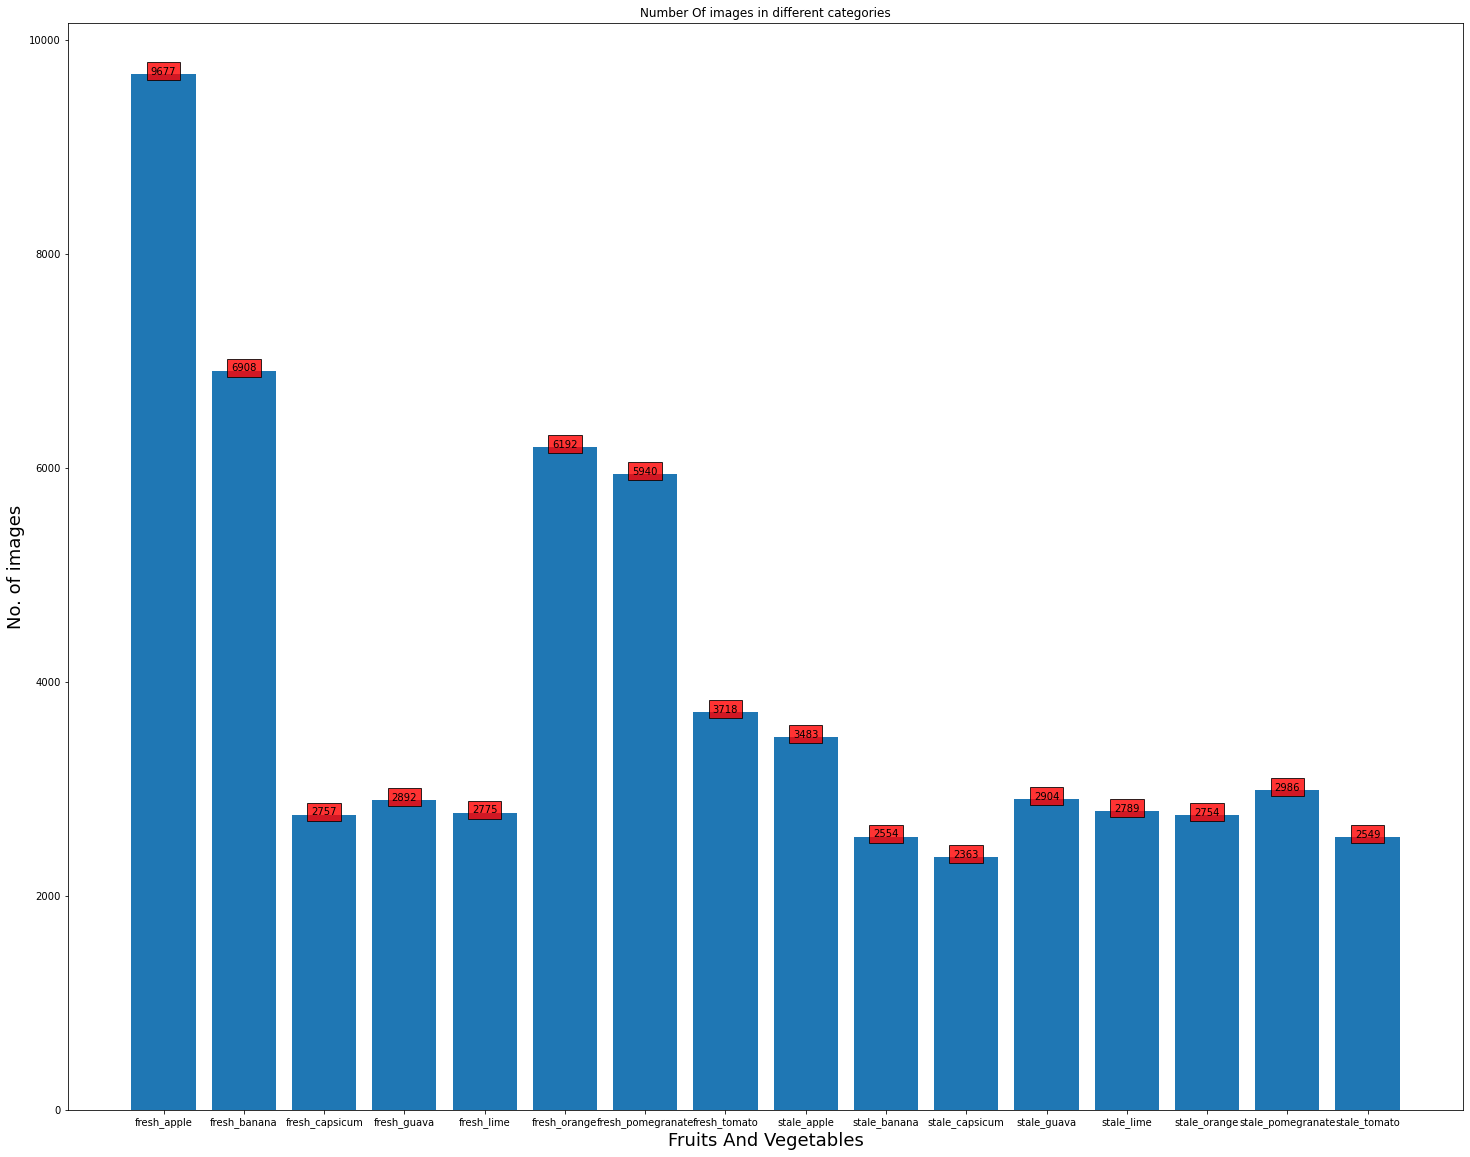

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

FruitsAndVegetables = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (25, 20))

plt.bar(FruitsAndVegetables, values)

for i in range(len(FruitsAndVegetables)):
        plt.text(i, values[i], values[i], ha = 'center', Bbox = dict(facecolor = 'red', alpha =.8))
        
plt.xlabel("Fruits And Vegetables", fontsize=18)
plt.ylabel("No. of images", fontsize=18)
plt.title("Number Of images in different categories")

plt.show()

# **Spliting data into test, train and validation folder**

In [ ]:
import os
import numpy as np
import shutil
import pandas as pd
import random
import time
from tqdm import tqdm



def train_test_split():
    print("########### Train Test Val Script started ###########", end='\n\n\n\n')
    #data_csv = pd.read_csv("DataSet_Final.csv") ##Use if you have classes saved in any .csv file

    root_dir = 'C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file_balanced'
    

    #for name in data_csv['names'].unique()[:10]:
    #    classes_dir.append(name)

    processed_dir = 'C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file'

    classes_dir = os.listdir(processed_dir)

    val_ratio = 0.20
    test_ratio = 0.10


    for iteration, cls in enumerate(classes_dir):
        # Creating partitions of the data after shuffeling
        print("\n\n"+"$$$$$$$ Class Name " + str(iteration) + ": " +cls + " $$$$$$$")
        src = processed_dir +"/" + cls  # Folder to copy images from

        number_of_sample_each_class = 2300

        allFileNames = random.sample(os.listdir(src), number_of_sample_each_class)

        print('Total images: '+ str(len(allFileNames)))

        np.random.shuffle(allFileNames)

        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

        
        

        # # Creating Train / Val / Test folders (One time use)
        if os.path.exists(root_dir + '/train/' + cls) == False:
          os.makedirs(root_dir + '/train/' + cls)
        if os.path.exists(root_dir + '/val/' + cls) == False:
          os.makedirs(root_dir + '/val/' + cls)
        if os.path.exists(root_dir + '/test/' + cls) == False:
          os.makedirs(root_dir + '/test/' + cls)

        print('Training: '+ str(len(train_FileNames)))
        for iteration, name in enumerate(tqdm(train_FileNames)):
            shutil.copy(name, root_dir + '/train/' + cls)
            basename = os.path.basename(name)
            os.rename(root_dir + '/train/' + cls + '/' +basename, root_dir + '/train/' + cls + '/' + cls + "{0:0=4d}".format(iteration) + ".png")


        print('Validation: '+  str(len(val_FileNames)))
        for iteration, name in enumerate(tqdm(val_FileNames)):
            shutil.copy(name, root_dir + '/val/' + cls)
            basename = os.path.basename(name)
            os.rename(root_dir + '/val/' + cls + '/' +basename, root_dir + '/val/' + cls + '/' + cls + "{0:0=4d}".format(iteration) + ".png")
            
        print('Testing: '+ str(len(test_FileNames)))
        for iteration, name in enumerate(tqdm(test_FileNames)):
            shutil.copy(name, root_dir + '/test/' + cls)
            basename = os.path.basename(name)
            os.rename(root_dir + '/test/' + cls + '/' +basename, root_dir + '/test/' + cls + '/' + cls + "{0:0=4d}".format(iteration) + ".png")
            
           
    print("########### Train Test Val Script Ended ###########")

train_test_split()

  1%|▊                                                                              | 17/1610 [00:00<00:09, 169.45it/s]

########### Train Test Val Script started ###########





$$$$$$$ Class Name 0: fresh_apple $$$$$$$
Total images: 2300
Training: 1610


  8%|██████▎                                                                         | 18/230 [00:00<00:01, 172.55it/s]

Validation: 230


  4%|███▎                                                                            | 19/460 [00:00<00:02, 169.24it/s]

Testing: 460


  1%|▉                                                                              | 18/1610 [00:00<00:08, 178.49it/s]



$$$$$$$ Class Name 1: fresh_banana $$$$$$$
Total images: 2300
Training: 1610


 12%|█████████▋                                                                      | 28/230 [00:00<00:01, 138.23it/s]

Validation: 230


  7%|█████▌                                                                          | 32/460 [00:00<00:02, 157.44it/s]

Testing: 460


  1%|▊                                                                              | 17/1610 [00:00<00:09, 162.02it/s]



$$$$$$$ Class Name 2: fresh_capsicum $$$$$$$
Total images: 2300
Training: 1610


  7%|█████▌                                                                          | 16/230 [00:00<00:01, 153.68it/s]

Validation: 230


  3%|██▌                                                                             | 15/460 [00:00<00:03, 143.68it/s]

Testing: 460


  1%|▌                                                                              | 11/1610 [00:00<00:15, 102.08it/s]



$$$$$$$ Class Name 3: fresh_guava $$$$$$$
Total images: 2300
Training: 1610


  8%|██████▎                                                                         | 18/230 [00:00<00:01, 161.27it/s]

Validation: 230


  0%|▎                                                                                 | 2/460 [00:00<00:23, 19.28it/s]

Testing: 460


  1%|▍                                                                               | 10/1610 [00:00<00:17, 90.68it/s]



$$$$$$$ Class Name 4: fresh_lime $$$$$$$
Total images: 2300
Training: 1610


  8%|██████▌                                                                         | 19/230 [00:00<00:01, 182.97it/s]

Validation: 230


  5%|███▊                                                                            | 22/460 [00:00<00:02, 192.77it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 5: fresh_orange $$$$$$$
Total images: 2300
Training: 1610


  4%|███▌                                                                             | 10/230 [00:00<00:02, 99.95it/s]

Validation: 230


  4%|██▉                                                                             | 17/460 [00:00<00:02, 153.56it/s]

Testing: 460


100%|███████████████████████████████████████████████████████████████████████████████| 460/460 [00:03<00:00, 141.01it/s]




$$$$$$$ Class Name 6: fresh_pomegranate $$$$$$$


  1%|▍                                                                                | 9/1610 [00:00<00:18, 85.27it/s]

Total images: 2300
Training: 1610


  8%|██████▎                                                                         | 18/230 [00:00<00:01, 168.93it/s]

Validation: 230


  4%|███▍                                                                            | 20/460 [00:00<00:02, 197.32it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 7: fresh_tomato $$$$$$$
Total images: 2300
Training: 1610


  9%|██████▉                                                                         | 20/230 [00:00<00:01, 174.17it/s]

Validation: 230


  4%|███▏                                                                            | 18/460 [00:00<00:02, 170.72it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 8: stale_apple $$$$$$$
Total images: 2300
Training: 1610


  4%|███▏                                                                              | 9/230 [00:00<00:02, 89.52it/s]

Validation: 230


  4%|██▉                                                                             | 17/460 [00:00<00:02, 162.65it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 9: stale_banana $$$$$$$
Total images: 2300
Training: 1610


  8%|██████▎                                                                         | 18/230 [00:00<00:01, 170.31it/s]

Validation: 230


  3%|██▎                                                                             | 13/460 [00:00<00:03, 123.03it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 10: stale_capsicum $$$$$$$
Total images: 2300
Training: 1610


  0%|                                                                                          | 0/230 [00:00<?, ?it/s]

Validation: 230


  4%|███▎                                                                            | 19/460 [00:00<00:02, 166.67it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 11: stale_guava $$$$$$$
Total images: 2300
Training: 1610


  7%|█████▉                                                                          | 17/230 [00:00<00:01, 150.24it/s]

Validation: 230


  3%|██▊                                                                             | 16/460 [00:00<00:02, 159.19it/s]

Testing: 460


100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [00:05<00:00, 87.41it/s]




$$$$$$$ Class Name 12: stale_lime $$$$$$$


  0%|▏                                                                                | 4/1610 [00:00<00:52, 30.59it/s]

Total images: 2300
Training: 1610


  4%|███▌                                                                             | 10/230 [00:00<00:02, 94.63it/s]

Validation: 230


  2%|█▊                                                                               | 10/460 [00:00<00:05, 87.87it/s]

Testing: 460


100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [00:05<00:00, 90.29it/s]




$$$$$$$ Class Name 13: stale_orange $$$$$$$


  1%|▍                                                                                | 9/1610 [00:00<00:18, 88.60it/s]

Total images: 2300
Training: 1610


  4%|███▌                                                                             | 10/230 [00:00<00:02, 96.45it/s]

Validation: 230


  2%|█▉                                                                               | 11/460 [00:00<00:04, 99.01it/s]

Testing: 460


100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [00:06<00:00, 71.43it/s]




$$$$$$$ Class Name 14: stale_pomegranate $$$$$$$


  0%|▏                                                                                | 3/1610 [00:00<01:38, 16.34it/s]

Total images: 2300
Training: 1610


  1%|▋                                                                                 | 2/230 [00:00<00:21, 10.47it/s]

Validation: 230


  4%|███▍                                                                            | 20/460 [00:00<00:02, 184.94it/s]

Testing: 460


  0%|                                                                                         | 0/1610 [00:00<?, ?it/s]



$$$$$$$ Class Name 15: stale_tomato $$$$$$$
Total images: 2300
Training: 1610


  4%|███▌                                                                             | 10/230 [00:00<00:02, 91.98it/s]

Validation: 230


  2%|█▌                                                                                | 9/460 [00:00<00:05, 82.49it/s]

Testing: 460


100%|████████████████████████████████████████████████████████████████████████████████| 460/460 [00:05<00:00, 79.13it/s]

########### Train Test Val Script Ended ###########


# **Comparing amount of data each class after Data Spliting**

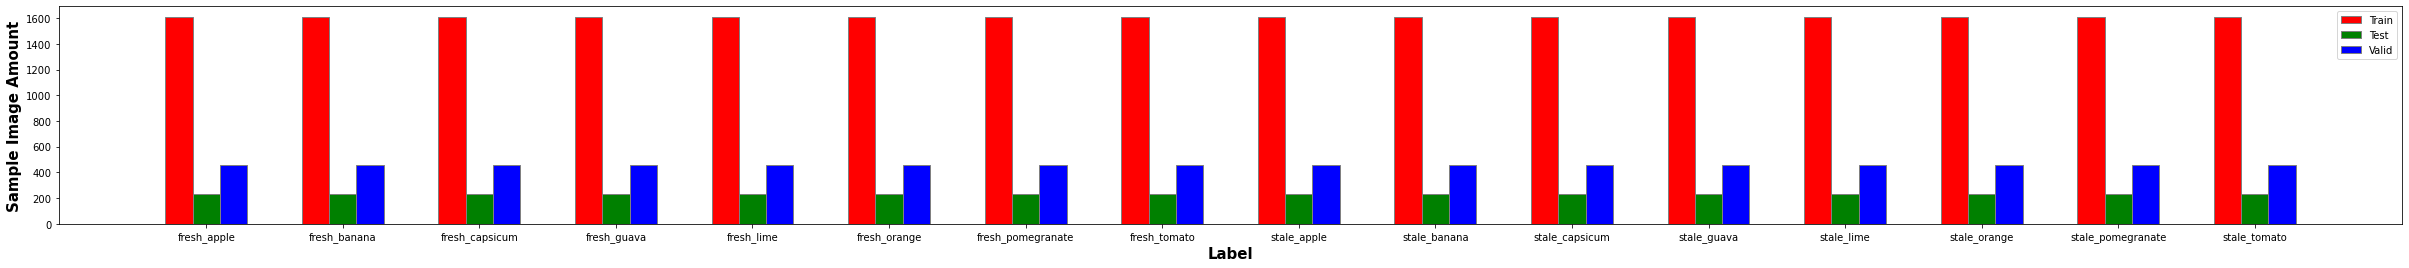

In [ ]:
from matplotlib import pyplot as plt

# set width of bar
barWidth = 0.20
fig = plt.subplots(figsize =(42, 4))

# # function to add value labels
# def addlabels(x,y,z):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center',
#                  Bbox = dict(facecolor = 'red', alpha =.8))

classes_dir = os.listdir("C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/master data file_balanced/train")

train = []
test = []
valid = []
for i in range(len(classes_dir)):
  train.append(1610)
  test.append(230)
  valid.append(460)
# Set position of bar on X axis
br1 = np.arange(len(train))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, train, color ='r', width = barWidth,
		edgecolor ='grey', label ='Train')
plt.bar(br2, test, color ='g', width = barWidth,
		edgecolor ='grey', label ='Test')
plt.bar(br3, valid, color ='b', width = barWidth,
		edgecolor ='grey', label ='Valid')

# addlabels(train, test, valid)
# Adding Xticks
plt.xlabel('Label', fontweight ='bold', fontsize = 15)
plt.ylabel('Sample Image Amount', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(train))],
		classes_dir)

plt.legend()
plt.show()

# **<font color="Red">Data Preprocessing**

In [ ]:
train_path = 'C:/Users/88017/OneDrive - LS/Desktop/FinDatasetBalanced/train'
valid_path = 'C:/Users/88017/OneDrive - LS/Desktop/FinDatasetBalanced/val'
test_path = 'C:/Users/88017/OneDrive - LS/Desktop/FinDatasetBalanced/test'

In [ ]:
import os
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

classe_labels = os.listdir(train_path)
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=classe_labels, batch_size=32)

valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input, rotation_range=) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=classe_labels, batch_size=32)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=classe_labels, batch_size=32, shuffle=False)

Found 25760 images belonging to 16 classes.
Found 3680 images belonging to 16 classes.
Found 7360 images belonging to 16 classes.


# **<font color="red">AccuracyPerEpoch**

In [ ]:
import matplotlib.pyplot as plt 
def accuracyLoss(model_history, name):

  dir = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/"+name+"/"

  # summarize history for accuracy
  plt.plot(model_history['accuracy'])
  plt.plot(model_history['val_accuracy'])
  plt.title('model accuracy '+ name)
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(dir+name+'_AccuracyPerEpoch.png')
  plt.show()


  # summarize history for loss
  plt.plot(model_history['loss'])
  plt.plot(model_history['val_loss'])
  plt.title('model loss '+ name)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.savefig(dir+name+'_LossPerEpoch.png')
  plt.show()

# **<font color="red">Save and Load a Model and Its history**

In [ ]:
def SaveHistory(model, name):
  import os
  import os.path
  directory = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/"+name+"/"
  from pathlib import Path
  Path(directory).mkdir(parents=True, exist_ok=True)
  np.save(directory+name+".npy",model.history)

In [ ]:
def LoadHistory(name):
  directory = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/"+name+"/"+name+".npy"
  model = np.load(directory,allow_pickle='TRUE').item()
  return model

In [ ]:
def SavingEntirety(model, name):
  import os
  import os.path
  directory = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/"+name+"/"
  from pathlib import Path
  Path(directory).mkdir(parents=True, exist_ok=True)
  model.save(directory+name+".h5")

In [ ]:
def LoadingEntirety(name):
  directory = "C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/"+name+"/"
  from tensorflow.keras.models import load_model
  model = load_model(directory+name+'.h5')
  return model

# **<font color="red">Confusion Tree**

In [ ]:
from sklearn.metrics import confusion_matrix

import itertools

def ConfusionMatrix(model, name):
    def plot_confusion_matrix(cm, classes,
                            normalize=False,
                            title='Confusion matrix',
                            cmap=plt.cm.Blues):
        """
        This function prints and plots the confusion matrix.
        Normalization can be applied by setting `normalize=True`.
        """
        plt.figure(figsize=(15, 15))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()
        tick_marks = np.arange(len(classes))
        plt.xticks(tick_marks, classes, rotation=45)
        plt.yticks(tick_marks, classes)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            print("Normalized confusion matrix")
        else:
            print('Confusion matrix, without normalization')

        print(cm)

        thresh = cm.max() / 2.
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label')

    # model_predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)
    print("model_predictions")
    model_predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=1)
    test_batches.classes
    cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(model_predictions, axis=-1))
    cm_plot_labels = classe_labels
    plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

    for matrix in confusion_matrices:
        fig = plt.figure()
        plt.matshow(cm)
        plt.title('Confusion Matrix Of'+name)
        plt.colorbar()
        plt.ylabel('True Label')
        plt.xlabel('Predicated Label')
        fig.savefig('C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/confusion_matrix'+str(learning_values.pop())+'.jpg')

# **<font color="red">visualizeModel**

In [ ]:
def visualizeModel(model):
    return tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True, show_layer_names=True,
    rankdir='TB',
    expand_nested=True,
    dpi=96,
    layer_range=None,
    show_layer_activations=True)

# **CNN tutorial |Multiclass image Classification using CNN keras (Custom Fruit And Vegetable Dataset) |Deep learning**

In [ ]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.models import Model


x = keras.Input(shape=(224, 224, 3))
kernel_size = (3, 3)
# 1st Layer
y = Conv2D(filters=16, kernel_size=3, strides= 1, padding= 'same', activation='relu')(x)
y = Conv2D(filters=16, kernel_size=3, strides= 1, padding= 'same', activation='relu')(y)
# y = MaxPool2D()(y)

# 2nd Layer
y = Conv2D(filters=32, kernel_size=kernel_size, activation='relu')(y)
y = Conv2D(filters=32, kernel_size=kernel_size, activation='relu')(y)
y = MaxPool2D()(y)

# 3rd Layer
y = Conv2D(filters=64, kernel_size=kernel_size, activation='relu')(y)
y = Conv2D(filters=64, kernel_size=kernel_size, activation='relu')(y)
y = MaxPool2D()(y)

#flattening the 2D matrix into 1D matrix
y = Flatten()(y)
# dropout regularization rate=0.2
y = Dropout(0.2)(y)

#Dense Layer
y = Dense(128, activation='relu')(y)
y = Dense(64, activation='relu')(y)
outputs = Dense(16, activation='softmax')(y)
#  # model building by supplying inputs/outputs
freshNet = Model(inputs=x, outputs=outputs)

In [ ]:
freshNet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
freshNet.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 16)      448       
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 16)      2320      
                                                                 
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      4640      
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 110, 110, 32)     0         
 2D)                                                             
                                                           

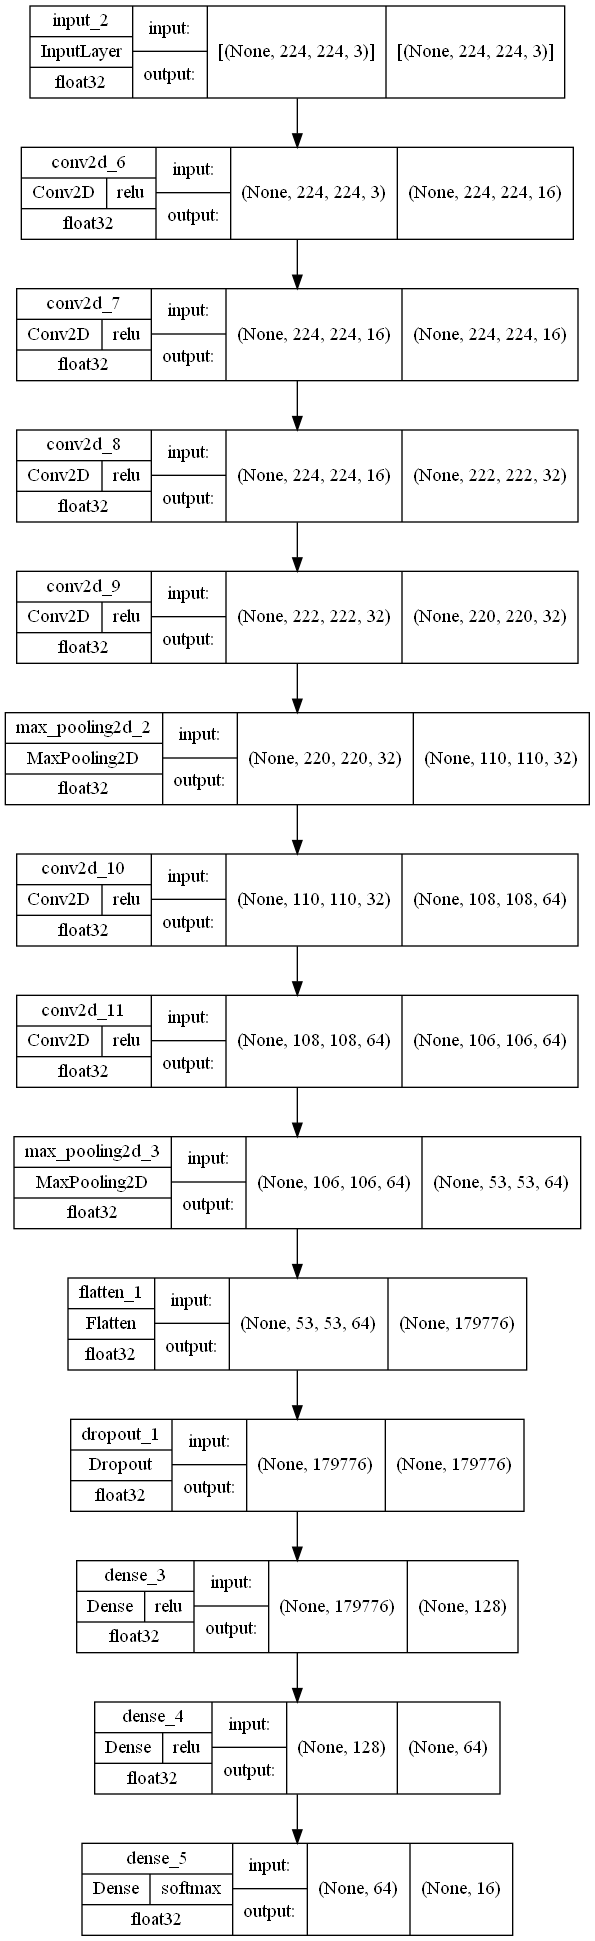

In [ ]:
visualizeModel(freshNet)

In [ ]:
name = "FreshNetV2"

In [ ]:
import keras
checkpoint_filepath = 'C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/'+name+'/checkpoints'+'/weights.{epoch:02d}-{val_loss:.2f}.h5'

model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

In [ ]:
freshNet_fit = freshNet.fit(train_batches,epochs=30,validation_data=valid_batches, steps_per_epoch=len(train_batches)/32, validation_steps=len(valid_batches)/32, verbose = 1,callbacks=[model_checkpoint_callback])

Epoch 1/30
25/25 [==============================] - 121s 5s/step - loss: 11.8219 - accuracy: 0.0757 - val_loss: 2.9743 - val_accuracy: 0.1641
Epoch 2/30
25/25 [==============================] - 131s 5s/step - loss: 2.7869 - accuracy: 0.1082 - val_loss: 2.6114 - val_accuracy: 0.1797
Epoch 3/30
25/25 [==============================] - 123s 5s/step - loss: 2.4747 - accuracy: 0.1959 - val_loss: 2.2000 - val_accuracy: 0.3203
Epoch 4/30
25/25 [==============================] - 128s 5s/step - loss: 2.1482 - accuracy: 0.3161 - val_loss: 2.1595 - val_accuracy: 0.2500
Epoch 5/30
25/25 [==============================] - 133s 5s/step - loss: 1.9455 - accuracy: 0.3630 - val_loss: 1.8377 - val_accuracy: 0.4219
Epoch 6/30
25/25 [==============================] - 133s 5s/step - loss: 1.7282 - accuracy: 0.4483 - val_loss: 1.5918 - val_accuracy: 0.5703
Epoch 7/30
25/25 [==============================] - 122s 5s/step - loss: 1.4583 - accuracy: 0.5625 - val_loss: 1.7346 - val_accuracy: 0.4375
Epoch 8/30
2

In [ ]:
import numpy as np
SaveHistory(freshNet_fit, name)

In [ ]:
freshNet_history = LoadHistory(name)

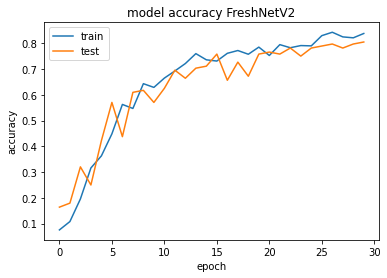

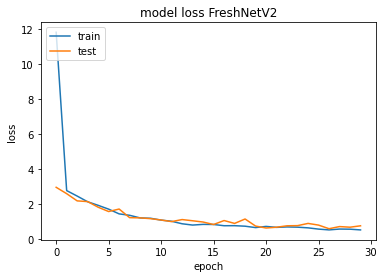

In [ ]:
accuracyLoss(freshNet_history, name)

In [ ]:
SavingEntirety(freshNet, name)

In [ ]:
loaded_freshNet = LoadingEntirety(name)

In [ ]:
weights_path = 'C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/'+name+'/checkpoints/'
weights = os.listdir(weights_path)
max_weight = max(weights)
max_weight_path = weights_path + max_weight
print(max_weight_path)

C:/Users/88017/OneDrive - LS/Desktop/Food Freshness Detection/Thesis Save Data/FreshNetV2/checkpoints/weights.30-0.78.h5


In [ ]:
loaded_freshNet.load_weights(max_weight_path)

model_predictions
230/230 [==============================] - 335s 1s/step
Confusion matrix, without normalization
[[301  27   4  13   4   4   4  54  17   3   1   9   2   2  11   4]
 [ 17 369   0   1   7   4   1   4   5   2   2  18  15  14   0   1]
 [  1   1 331   3   6   6   2  12   4   0  85   1   0   3   5   0]
 [ 10  13   5 364  16   4   0  20   0   2   0   4  17   3   2   0]
 [  2   1   3   7 427   3   0   0   0   0   0   3   3  11   0   0]
 [  3  21   4   5   5 347   0  15  27   1   0   3   5  23   1   0]
 [  3   0   4   6   0   1 413  10   0   5   0   0   0   0  17   1]
 [ 20   0   0   3   0   0   0 376   2   0   0   0   2   2   1  54]
 [  6   6   0   0   0   5   0  22 355   4   4  14   9   7  23   5]
 [  1  22   1   7   1   3   1   6  10 354   0  10  24   7  10   3]
 [  1   1  26   0   2   3   0   8  15   0 387   0   0   2   0  15]
 [  1   1   0  16   1   3   0   0   3  10   0 335  67  10  13   0]
 [  0   2   0   0   4   1   0   0   1  12   0  57 360  19   4   0]
 [  4   5   0  

NameError: name 'confusion_matrices' is not defined

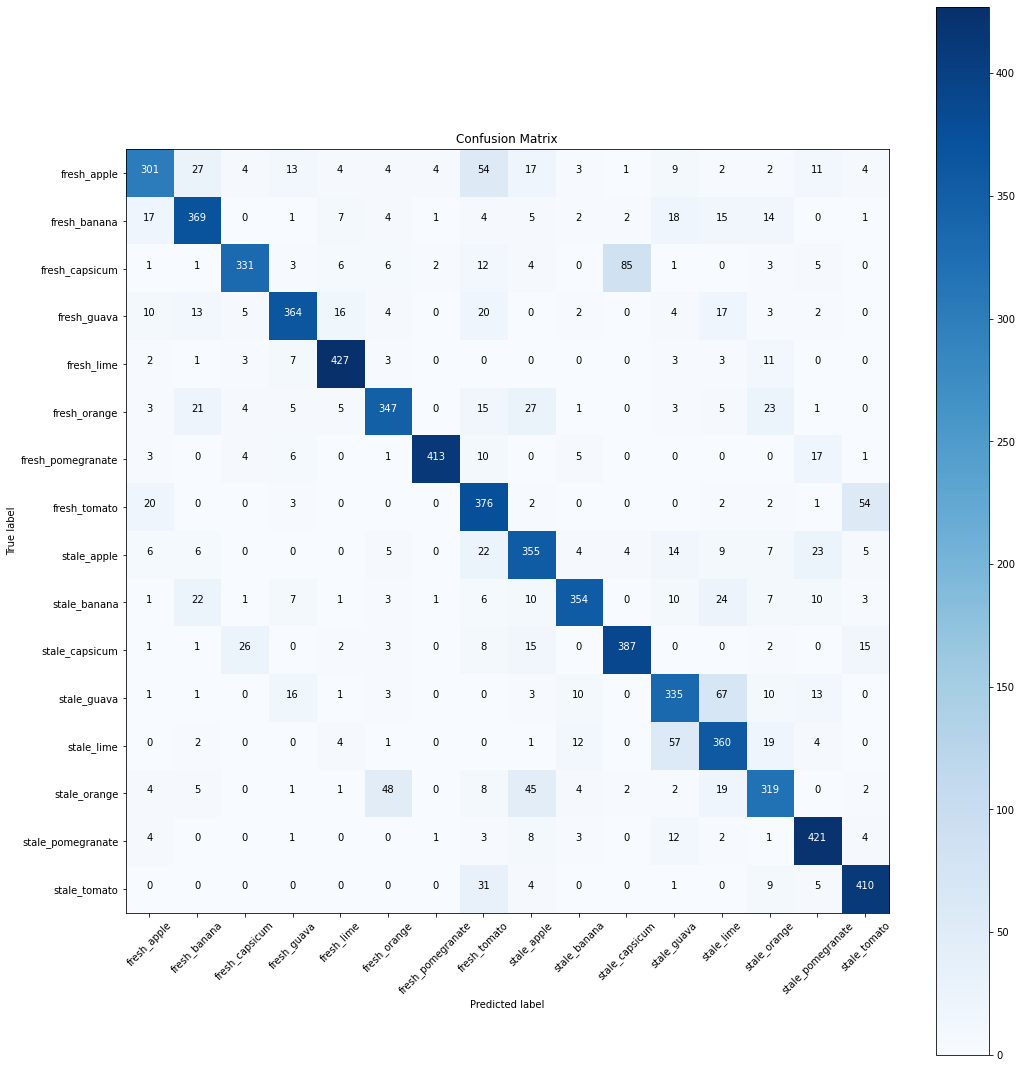

In [ ]:
ConfusionMatrix(loaded_freshNet, name)